In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('/Users/qinhuahe/Downloads/GiveMeSomeCredit/cs-training.csv',index_col=0)
df=data.copy()
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
df['SeriousDlqin2yrs'].value_counts(1)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

In [6]:
df = df.fillna(df.mean(numeric_only=True))

## 规则探索

In [8]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [10]:
df1=df[['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']]

In [11]:
import itertools

# 提取所有变量名
feature_list = [f for f in df1.columns if f not in ['SeriousDlqin2yrs']]

# 组合成支持单变量和双变量的列表
feature_pairs = [(f,) for f in feature_list] + list(itertools.combinations(feature_list, 2))

# 运行规则挖掘，并保存图像到目录
tree_result_df = model_tree(df1, feature_pairs, target_col='SeriousDlqin2yrs', save_dir='./tree_rules')


开始扫描组合，总计： 55
✓ RevolvingUtilizationOfUnsecuredLines - lift: 5.61
✓ NumberOfTime30-59DaysPastDueNotWorse - lift: 6.92
✓ NumberOfOpenCreditLinesAndLoans - lift: 3.84
✓ NumberOfTimes90DaysLate - lift: 7.47
✓ NumberRealEstateLoansOrLines - lift: 2.27
✓ NumberOfTime60-89DaysPastDueNotWorse - lift: 7.51
✓ age - NumberOfDependents - lift: 2.05
✓ 筛选完成，共计满足 lift > 3 的规则：7 条


In [12]:
pd.set_option('display.max_colwidth', None)

In [13]:

all_rules = []

for i in range(len(tree_result_df)):
    row = tree_result_df.iloc[i]
    clf = row['value']
    features = row['feature_names'].split(' - ')
    
    rules = extract_all_leaf_rules(
        clf, features, df,
        target_col='SeriousDlqin2yrs',
        lift_threshold=1,# 只保留 lift >= 3 的规则
        base_bad_rate = 0.0668
    )
    
    if not rules.empty:
        rules['FeatureCombo'] = row['feature_names']
        all_rules.append(rules)

# 合并所有规则为一个表格
all_rules_df = pd.concat(all_rules, ignore_index=True)
all_rules_df = all_rules_df.sort_values(by='Lift', ascending=False).reset_index(drop=True)
all_rules_df

,Rule,Samples,Bad,BadRate,Lift,FeatureCombo
0,NumberOfTimes90DaysLate > 0.5000 & NumberOfTimes90DaysLate > 1.5000 & NumberOfTimes90DaysLate > 2.5000,1540,931,0.604545,9.050082,NumberOfTimes90DaysLate
1,NumberOfTime60-89DaysPastDueNotWorse > 0.5000 & NumberOfTime60-89DaysPastDueNotWorse > 1.5000 & NumberOfTime60-89DaysPastDueNotWorse > 2.5000,755,432,0.572185,8.565650,NumberOfTime60-89DaysPastDueNotWorse
2,NumberOfTime60-89DaysPastDueNotWorse > 0.5000 & NumberOfTime60-89DaysPastDueNotWorse > 1.5000 & NumberOfTime60-89DaysPastDueNotWorse <= 2.5000,1118,561,0.501789,7.511810,NumberOfTime60-89DaysPastDueNotWorse
3,NumberOfTimes90DaysLate > 0.5000 & NumberOfTimes90DaysLate > 1.5000 & NumberOfTimes90DaysLate <= 2.5000,1555,776,0.499035,7.470589,NumberOfTimes90DaysLate
4,NumberOfTime30-59DaysPastDueNotWorse > 0.5000 & NumberOfTime30-59DaysPastDueNotWorse > 1.5000 & NumberOfTime30-59DaysPastDueNotWorse > 3.5000,1597,739,0.462743,6.927285,NumberOfTime30-59DaysPastDueNotWorse
5,RevolvingUtilizationOfUnsecuredLines > 0.6981 & RevolvingUtilizationOfUnsecuredLines > 1.0010,3282,1230,0.374771,5.610352,RevolvingUtilizationOfUnsecuredLines
6,NumberOfTime30-59DaysPastDueNotWorse > 0.5000 & NumberOfTime30-59DaysPastDueNotWorse > 1.5000 & NumberOfTime30-59DaysPastDueNotWorse <= 3.5000 & NumberOfTime30-59DaysPastDueNotWorse > 2.5000,1754,618,0.352338,5.274514,NumberOfTime30-59DaysPastDueNotWorse
7,NumberOfTimes90DaysLate > 0.5000 & NumberOfTimes90DaysLate <= 1.5000,5243,1765,0.336639,5.039511,NumberOfTimes90DaysLate
8,NumberOfTime60-89DaysPastDueNotWorse > 0.5000 & NumberOfTime60-89DaysPastDueNotWorse <= 1.5000,5731,1777,0.310068,4.641737,NumberOfTime60-89DaysPastDueNotWorse
9,NumberOfTime30-59DaysPastDueNotWorse > 0.5000 & NumberOfTime30-59DaysPastDueNotWorse > 1.5000 & NumberOfTime30-59DaysPastDueNotWorse <= 3.5000 & NumberOfTime30-59DaysPastDueNotWorse <= 2.5000,4598,1219,0.265115,3.968791,NumberOfTime30-59DaysPastDueNotWorse


In [14]:
##重复上述步骤可得以下规则
df1 = df[
    ~(
        (df['NumberOfTime60-89DaysPastDueNotWorse'] > 0.5) |
        (df['NumberOfTimes90DaysLate'] > 0.5) |
        (df['NumberOfTime30-59DaysPastDueNotWorse'] > 1) |
        (df['RevolvingUtilizationOfUnsecuredLines'] >= 1) |
        (
            (df['RevolvingUtilizationOfUnsecuredLines'] >= 0.80114) &
            (df['NumberOfTime30-59DaysPastDueNotWorse'] >= 0.5)
        )
    )
]


df1['SeriousDlqin2yrs'].value_counts(),df1['SeriousDlqin2yrs'].value_counts(1),df1.shape

(0    124733
 1      3740
 Name: SeriousDlqin2yrs, dtype: int64,
 0    0.970889
 1    0.029111
 Name: SeriousDlqin2yrs, dtype: float64,
 (128473, 11))

# 模型

在通过上述规则后的样本进行模型探索，进一步控制风险

In [15]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import math

import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns

get_ipython().run_line_magic('matplotlib', 'inline')

import os

from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV,StratifiedKFold

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve

import warnings

import plotly.express as px

import sklearn.metrics as metrics

import xgboost as xgb

warnings.filterwarnings('ignore')

import seaborn as sns

In [16]:
dep=['SeriousDlqin2yrs']
feature_list=df1.columns.tolist()
feature_list=list(set(feature_list)-set(dep))
feature_list

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTimes90DaysLate',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfDependents',
 'age',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberRealEstateLoansOrLines',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans']

In [17]:
df1.shape

(128473, 11)

In [18]:
df_data=df1
X_train, X_test, y_train, y_test = train_test_split(df_data[feature_list], df_data['SeriousDlqin2yrs'], test_size=0.3, random_state=1,stratify=df_data['SeriousDlqin2yrs'])
print(y_train.mean()),print(y_train.shape),print(X_test.shape)

0.029111207481291212
(89931,)
(38542, 10)


(None, None, None)

In [19]:
eval_set = [(X_test, y_test)]
model_xgb = xgb.XGBClassifier(
                 max_depth=4,  
                 learning_rate=0.1,
                 n_estimators=100,
                 min_child_weight=5,
                 subsample=0.8,
                 scale_pos_weight=2,
                 reg_lambda=1,
                 gamma=10,
                 nthread=8, n_jobs=8,seed=2024).fit(X_train,y_train,eval_set=eval_set)

[0]	validation_0-logloss:0.19915
[1]	validation_0-logloss:0.19099
[2]	validation_0-logloss:0.18378
[3]	validation_0-logloss:0.17736
[4]	validation_0-logloss:0.17166
[5]	validation_0-logloss:0.16667
[6]	validation_0-logloss:0.16220
[7]	validation_0-logloss:0.15824
[8]	validation_0-logloss:0.15476
[9]	validation_0-logloss:0.15155
[10]	validation_0-logloss:0.14874
[11]	validation_0-logloss:0.14628
[12]	validation_0-logloss:0.14410
[13]	validation_0-logloss:0.14204
[14]	validation_0-logloss:0.14026
[15]	validation_0-logloss:0.13866
[16]	validation_0-logloss:0.13722
[17]	validation_0-logloss:0.13601
[18]	validation_0-logloss:0.13482
[19]	validation_0-logloss:0.13386
[20]	validation_0-logloss:0.13292
[21]	validation_0-logloss:0.13215
[22]	validation_0-logloss:0.13149
[23]	validation_0-logloss:0.13079
[24]	validation_0-logloss:0.13017
[25]	validation_0-logloss:0.12966
[26]	validation_0-logloss:0.12928
[27]	validation_0-logloss:0.12885
[28]	validation_0-logloss:0.12849
[29]	validation_0-loglos

train_ks: 0.44745158171364496
evl_ks: 0.4194592194780833


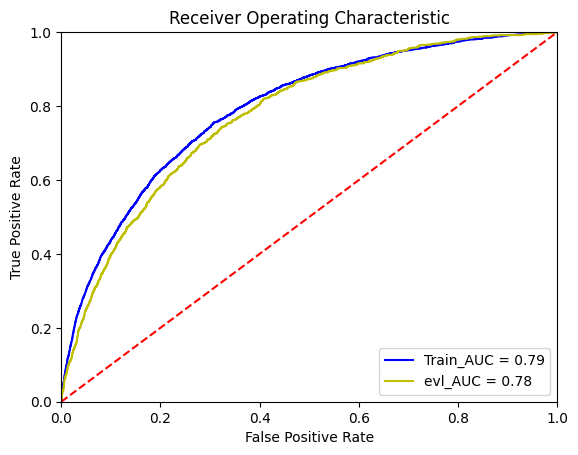

In [20]:
warnings. filterwarnings('ignore')
y_pred_train = model_xgb.predict_proba(X_train)[:,1]

fpr_xgb_train,tpr_xgb_train,_=metrics.roc_curve(y_train,y_pred_train)

train_ks = abs(fpr_xgb_train-tpr_xgb_train).max()

roc_auc_train = metrics.auc(fpr_xgb_train, tpr_xgb_train)

print('train_ks:',train_ks)

y_pred = model_xgb.predict_proba(X_test)[:,1]

fpr_xgb_evl,tpr_xgb_evl,_=metrics.roc_curve(y_test,y_pred)

evl_ks = abs(fpr_xgb_evl-tpr_xgb_evl).max()

roc_auc_evl = metrics.auc(fpr_xgb_evl, tpr_xgb_evl)

print('evl_ks:',evl_ks)

plt.title('Receiver Operating Characteristic')

plt.plot(fpr_xgb_train, tpr_xgb_train, 'b', label = 'Train_AUC = %0.2f' % roc_auc_train)

plt.plot(fpr_xgb_evl, tpr_xgb_evl, 'y', label = 'evl_AUC = %0.2f' % roc_auc_evl)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])

plt.ylim([0, 1])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

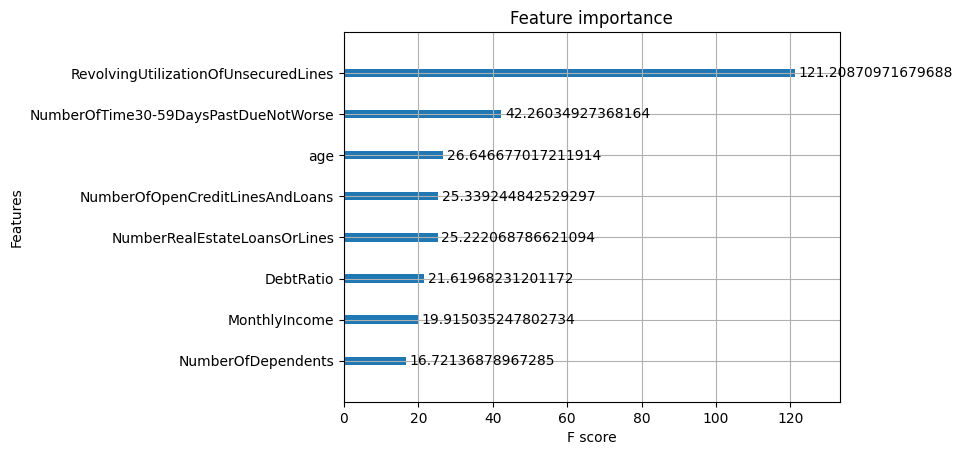

In [21]:
from xgboost import plot_importance
#plt.rcParams['font.familiy']='SimHei'
plot_importance(model_xgb,importance_type='gain',max_num_features=15)
plt.show()

In [22]:
df_data['SeriousDlqin2yrs'].value_counts(1)

0    0.970889
1    0.029111
Name: SeriousDlqin2yrs, dtype: float64

## 模型概率转分数

In [23]:
import math
p_to_score(df_data['SeriousDlqin2yrs'].sum()/len(df_data), basepoints=600, PDO=-20, baseodds=1.0/60, low_score=300, high_score=700)

(616.94, 718.1378119121704, 28.85390081777927)

In [24]:
A,B = _score_cal(300, df_data['SeriousDlqin2yrs'].sum()/len(df_data), -30)

In [25]:
df_data['prob'] = model_xgb.predict_proba(df_data[feature_list])[:,0]#输出概率
df_data['final_score'] = df_data['prob'].map(lambda x: Prob2Score_1(x, basePoint=A, PDD=B))#设置基础分 和 步长

In [26]:
df_score = split_group20(df_data, score='final_score')
scores10 = list(df_score['min'])
scores10.sort()
map_group_score = get_map_score(scores10)
df_result = map_score(df_data, map_group_score, score='final_score', target='SeriousDlqin2yrs',random_rate=0.029)
df_result

,percent,min,max,total,bad,good,bad_rate,lift
1,0.044562,652,663,5725,14,5711,0.002445,0.084325
2,0.054696,643,651,7027,18,7009,0.002562,0.088329
3,0.049232,638,642,6325,29,6296,0.004585,0.158103
4,0.049948,633,637,6417,32,6385,0.004987,0.171957
5,0.041114,629,632,5282,37,5245,0.007005,0.241549
6,0.053770,624,628,6908,52,6856,0.007528,0.259569
7,0.056214,619,623,7222,68,7154,0.009416,0.324678
8,0.047800,614,618,6141,64,6077,0.010422,0.359371
9,0.050859,608,613,6534,63,6471,0.009642,0.332478
10,0.047847,602,607,6147,87,6060,0.014153,0.488043


In [27]:
ss=df_data[df_data['final_score']>586]
ss['SeriousDlqin2yrs'].value_counts(1),ss.shape

(0    0.990599
 1    0.009401
 Name: SeriousDlqin2yrs, dtype: float64,
 (78185, 15))

In [28]:
total_row = {
    'percent': np.nan,
    'min': 0,
    'max': 0,
    'total': 21527,
    'bad': 6286,
    'good': 21527 - 6286,
    'bad_rate': np.nan,
    'lift': np.nan
}

# 追加到 df_data
df_result = pd.concat([df_result, pd.DataFrame([total_row])], ignore_index=True)
df_result

,percent,min,max,total,bad,good,bad_rate,lift
0,0.044562,652,663,5725,14,5711,0.002445,0.084325
1,0.054696,643,651,7027,18,7009,0.002562,0.088329
2,0.049232,638,642,6325,29,6296,0.004585,0.158103
3,0.049948,633,637,6417,32,6385,0.004987,0.171957
4,0.041114,629,632,5282,37,5245,0.007005,0.241549
5,0.053770,624,628,6908,52,6856,0.007528,0.259569
6,0.056214,619,623,7222,68,7154,0.009416,0.324678
7,0.047800,614,618,6141,64,6077,0.010422,0.359371
8,0.050859,608,613,6534,63,6471,0.009642,0.332478
9,0.047847,602,607,6147,87,6060,0.014153,0.488043


In [29]:
##规则集
df2 = df_data[
    ~(
        (df_data['final_score'] <= 588)
        
    )
]


df2.shape

(76419, 15)

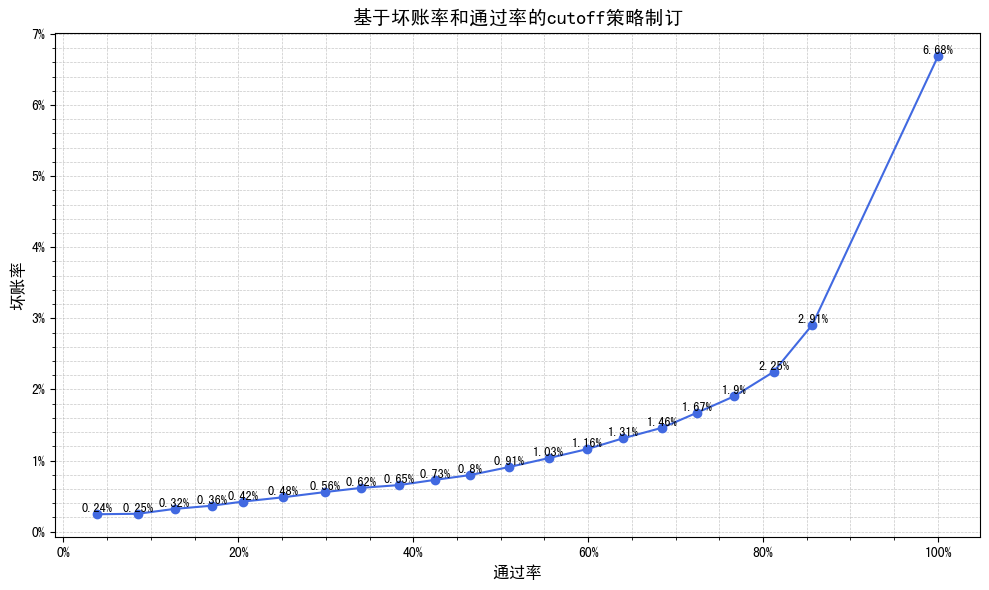

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 强制中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 示例：df_result 你已有
# 假设 df_result 包含以下字段：total, bad, min, percent

# 添加累计值
df_result['cum_total'] = df_result['total'].cumsum()
df_result['cum_bad'] = df_result['bad'].cumsum()
df_result['cum_pass_rate'] = df_result['cum_total'] / df_result['total'].sum()
df_result['cum_bad_rate'] = df_result['cum_bad'] / df_result['cum_total']
df_result['bad_rate_label'] = (df_result['cum_bad_rate'] * 100).round(2).astype(str) + '%'

# 开始绘图
fig, ax1 = plt.subplots(figsize=(10, 6))

# 主图：坏账率 vs 通过率
ax1.plot(df_result['cum_pass_rate'], df_result['cum_bad_rate'], marker='o', color='royalblue')

# 每个点上标注坏账率
for i in range(len(df_result)):
    ax1.text(df_result['cum_pass_rate'].iloc[i],
             df_result['cum_bad_rate'].iloc[i],
             df_result['bad_rate_label'].iloc[i],
             fontsize=9, ha='center', va='bottom')

# 设置主坐标轴格式
ax1.set_xlabel("通过率", fontsize=12)
ax1.set_ylabel("坏账率", fontsize=12)
ax1.set_title("基于坏账率和通过率的cutoff策略制订", fontsize=14)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
ax1.minorticks_on()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

## 添加右侧纵轴，标注对应的 min 值
#ax2 = ax1.twinx()
#ax2.set_ylim(ax1.get_ylim())  # 保持与左轴对齐
#ax2.set_yticks(df_result['cum_bad_rate'])  # Y 轴刻度与坏账率对应
#ax2.set_yticklabels(df_result['min'].astype(str))  # 对应 min 值作为标签
#ax2.set_ylabel("评分下限（min）", fontsize=12)
#ax2.tick_params(axis='y', labelsize=9)

plt.tight_layout()
plt.show()


# 最后可根据业务目标（通过率或者坏账率）在上图选择合适的cutoff